$$ \LaTeX \text{ command declarations here.}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
$$

# EECS 545:  Machine Learning
## Lecture 19:  Unsupervised Learning: PCA and ICA
* Instructor:  **Jacob Abernethy**
* Date:  March 28, 2016


*Lecture Exposition*: Saket


## References

This lecture draws from following resources:



## Independent Component Analysis


* Also called: “blind source separation”


* Suppose N independent signals are mixed, and sensed by N independent sensors.
    * Cocktail party with speakers and microphones.
    * EEG with brain wave sources and sensors.


* Can we reconstruct the original signals, given the mixed data from the sensors?

* The sources s must be independent.
    * And they **must be non-Gaussian**.
    * If Gaussian, then there is no way to find unique independent components.


* Linear mixing to get the sensor signals x.
    * $x = As$
    * or $s = Wx$ (i.e., $W = A^{-1}$ )
    

* A is called bases; W is called filters

## ICA: Algorithm

* There are several formulations of ICA:
    * Maximum likelihood
    * Maximizing non-Gaussianity (popular)
    

* Common steps of ICA (e.g., FastICA):
    * Apply PCA whitening (aka sphering) to the data
    * Find orthogonal unit vectors along which the that non-Gaussianity are maximized
    $$ \underset{W}{\\max}\hspace{1em} f(W \tilde x) \hspace{2em} s.t.\hspace{1em} WW^T = I$$
    where f(x) can be “kurtosis”, L1 norm, etc.

## Step 1: PCA whitening (preprocessing for ICA)

* Apply PCA: $ \Sigma = U \Lambda U^T $ 

* Project (rotate) to the principal components

* “Scale” each axis so that the transformed data has identity as covariance.

<img src="pca.jpg" align="middle">

## Step 2: Maximization

* Rotate to maximize non-Gaussianity

<img src="ica_1.png" align="middle">
$\hspace{6em}x \hspace{8em} x_{PCA} = U^Tx \hspace{6em} x_{PCA} = \Lambda^{-\frac{1}{2}} U^Tx \hspace{6em} x_{ICA} = V \Lambda^{-\frac{1}{2}} U^Tx$ 

## Mixture Example

* Input Signals and Density
<img src="ica_mix.png" align="middle">

* Remove correlations by whitening (sphering) the data.

<img src="ica_2.png" align="middle">

To whiten the input data:

* We want a linear transformation $ y = V x $

* So the components are uncorrelated: $\mathbb{E}[yy^T] = I $

* Given the original covariance $ C = \mathbb{E}[xx^T]$

* We can use $V = C^{-\frac {1}{2}} $

* Because $ \mathbb{E}[yy^T] = \mathbb{E}[Vxx^TV^T] = C^{-\frac {1}{2}} C C^{-\frac {1}{2}} = I $  

* Step 1 of FastICA

<img src="ica_3.png" align="middle">

* Step 2 of ICA

<img src="ica_4.png" align="middle">

* Step 3 of ICA

<img src="ica_5.png" align="middle">

* Step 4 of ICA

<img src="ica_6.png" align="middle">

* Step 5 of ICA: note that $p(y_1 ,y_2 ) = p(y_1 ) p(y_2 )$

<img src="ica_7.png" align="middle">

In [1]:
# Example from scikit: Blind source separation using FastICA

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

###############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

###############################################################################
# Plot results

def plotResults():
    plt.figure()

    models = [X, S, S_, H]
    names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals', 
         'PCA recovered signals']
    colors = ['red', 'steelblue', 'orange']

    for ii, (model, name) in enumerate(zip(models, names), 1):
        plt.subplot(4, 1, ii)
        plt.title(name)
        for sig, color in zip(model.T, colors):
            plt.plot(sig, color=color)

    plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
    plt.show()

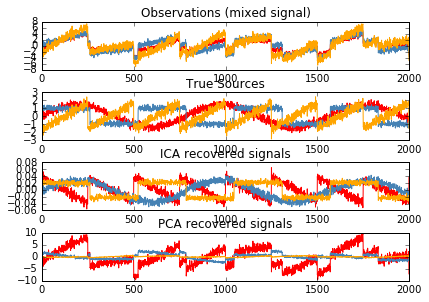

In [3]:
%matplotlib inline
plotResults()

## ICA: summary

* Learning can be done by PCA whitening followed kurtosis maximization.


* ICA is widely used for “blind-source separation.”


* The ICA components can be used for features.


* Limitation: difficult to learn overcomplete bases due to the orthogonality constraint

## Principal Component Analysis

#### High Dimensional data

* $\dots$ may have low-dimensional structure.

<img src="pca_1.png" align="middle">

* The data is 100x100-dimensional.
* But there are only three degrees of freedom, so it lies on a 3-dimensional subspace. (on a non-linear manifold, in this case)

* Given a set $X = \{x_n\}$ of observations 
    * in a space of dimension $D$, 
    * find a subspace of dimension $M < D$ 
    * that captures most of its variability.


* PCA can be described as either:
    * maximizing the variance of the projection, or
    * minimizing the squared approximation error.

## Two Descriptions of PCA

* Approximate with the projection:

    * Maximize variance, or

    * Minimize squared error
    
<img src="pca_2.png" height = "300px" width = "300px"  align="middle">

## Equivalent Descriptions

* With mean at the origin $ c_i^2 = a_i^2 + b_i^2 $

* With constant $c_i^2$

* Minimizing $b_i^2$

* Maximizes $a_i^2$

* And vice versa

<img src="pca_3.png" height = "300px" width = "300px"  align="middle">

## First Principal Component

* Given data points $\{x_n\}$ in $D$-dim space.

    * Mean $\bar x = \frac{1}{N} \sum_{n=1}^{N} x_n $

    * Data covariance ($D \times D$ matrix): 
     $ S = \frac{1}{N} \sum_{n=1}^{N}(x_n - \bar x)(x_n - \bar x)^T$


* Let $u_1$ be the principal component we want.
    * Length 1: $u_1^T u_1 = 1$
    * Projection of $x_n$: $u_1^T x_n$

* Maximize the projection variance:

$$ S = \frac{1}{N} \sum_{n=1}^{N}\{u_1^Tx_n - u_1^T \bar x \}^2 = u_1^TSu_1$$

* Use a Lagrange multiplier to enforce $u_1^T u_1 = 1$

* Maximize: $u_1^T S u_1 + \lambda(1-u_1^T u_1)$

* Derivative is zero when $ Su_1 = \lambda u_1$
    * That is, $u_1^T S u_1 = \lambda $

* So $u_1$ is eigenvector of $S$ with largest eigenvalue.

## PCA by Maximizing Variance

* Repeat to find the M eigenvectors of the data covariance matrix S corresponding to the M largest eigenvalues.


* We can do the same thing by minimizing the squared error of the projection.

## Learning features via PCA

#### Example: Eigenfaces
<img src="pca_9.png"  align="middle">

In [9]:
## scikit example: Faces recognition example using eigenfaces and SVMs

from __future__ import print_function

from time import time
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]


###############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

#print("Extracting the top %d eigenfaces from %d faces"
#      % (n_components, X_train.shape[0]))
#t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
#print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

#print("Projecting the input data on the eigenfaces orthonormal basis")
#t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#print("done in %0.3fs" % (time() - t0))


###############################################################################
# Train a SVM classification model

#print("Fitting the classifier to the training set")
#t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
#print("done in %0.3fs" % (time() - t0))
#print("Best estimator found by grid search:")
#print(clf.best_estimator_)


###############################################################################
# Quantitative evaluation of the model quality on the test set

#print("Predicting people's names on the test set")
#t0 = time()
y_pred = clf.predict(X_test_pca)
#print("done in %0.3fs" % (time() - t0))

#print(classification_report(y_test, y_pred, target_names=target_names))
#print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]



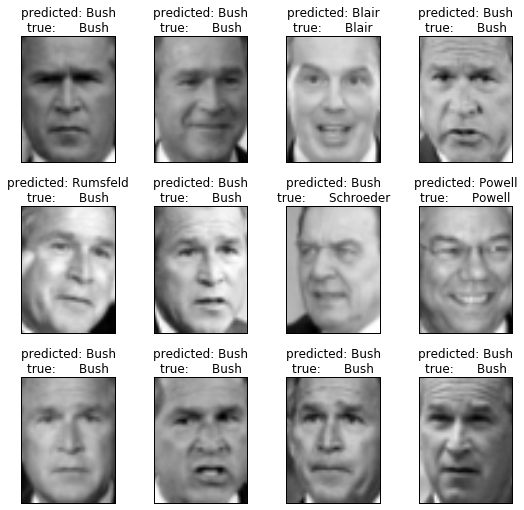

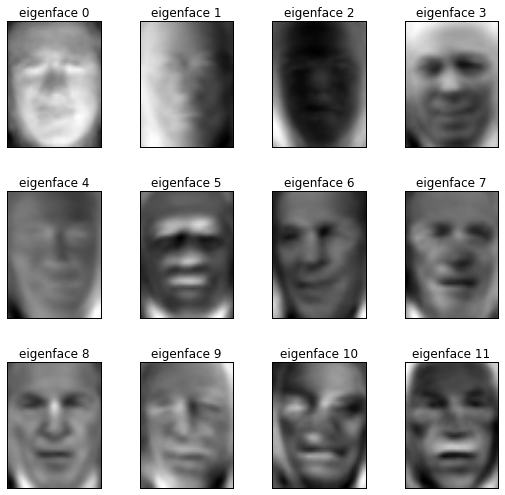

In [10]:
plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## Limits to PCA

* Maximizing variance is not always the best way to make the structure visible.


* PCA vs Fisher’s linear discriminant

<img src="pca_6.png" height = "300px" width = "300px"  align="middle">

## Probabilistic PCA

* We can view PCA as solving a probabilistic latent variable problem.


* Describe a distribution $p(x)$ in $D$-dimensional space, in terms of a latent variable $z$ in $M$-dimensional space.
$ x  = Wz + \mu + \epsilon $ where
$ p(z) =  \mathcal (z| 0, I) $


* W is a $D \times M$ linear transformation from $z$ to $x$ 

* Given the generative model
$$ x  = Wz + \mu + \epsilon $$


* we can infer

$$ \mathbb{E}[x]  = \mathbb{E}[Wz + \mu + \epsilon] = \mu $$

$$ \begin {align}
cov[x]  
&= \mathbb{E}[(Wz + \epsilon)(Wz + \epsilon)^T] \\
&= \mathbb{E}[(Wzz^TW^T] + \mathbb{E}[ \epsilon \epsilon^T] \\
&= WW^T + \sigma^2 I
\end{align}
$$





* The generative model
$$ x  = Wz + \mu + \epsilon $$

can be illustrated

<img src="pca_7.png" height = "600px" width = "600px"  align="middle">



## Likelihood of Probabilistic PCA

* (Marginal) likelihood
$$ \begin{align}
ln \{p(X|\mu, W, \sigma^2)\}
&= \sum_n p(x_n| W, \mu, \sigma^2) \\
&= -\frac{ND}{2} ln 2\pi - \frac{N}{2} ln |C| -\frac{1}{2} \sum_n (x_n - \mu)^TC^{-1}(x_n - \mu) \\
C = WW^T + \sigma^2 I 
\end{align}
$$


* We can simply maximize this likelihood function with respect to $\mu, W, \sigma$.

## Maximum Likelihood Parameters

* Mean: $\mu = \bar x$ 

* Noise: $ \sigma_{ML}^2 = \frac{1}{D-M} \sum_{i=M+1} ^{D} \lambda_i $

* W: $W_{ML} = U_M (L_M - \sigma^2 I)^{\frac{1}{2}} R $

where $L_M$ is diag with the $M$ largest eigenvalues
and $U_M$ is the $M$ corresponding eigenvectors
And $R$ is an arbitrary $M\times M$ rotation (i.e., $z$ can be defined by rotating “back”)

## Maximum likelihood by EM

* Latent variable model

$$ p(z) = \mathcal {N}(z|0, I) $$
$$ p(x|z) = \mathcal{N}(x|Wz + \mu, \sigma^2 I) $$


* E-step: Estimate the posterior $Q(z)=P(z|x)$ 
    * Use linear Gaussian


* M-step: Maximize the data-completion likelihood given $Q(z)$:
$$ \underset{\theta = \{\mu, W, \sigma\}}{\\max}\hspace{1em}  \sum_i \sum_{z^{(i)}} Q(z^{(i)}) log P_\theta (x^{(i)}, z^{(i)}) $$ 

## Finding PCA params by EM

<img src="pca_8.png"  align="middle">

## Bayesian PCA (sketch)

* Note that the maximum likelihood for probabilistic PCA is still a point estimate on $W$.

* Main idea of Bayesian PCA: Put a prior on $W$
$$ p(W|\alpha) = \prod_i (\frac{\alpha_i}{2\pi})^\frac{D}{2} exp(-\frac{1}{2} \alpha_i w_i^T w_i) $$

* Maximize the marginal likelihood (i.e., marginalize $W$)
$$ p(X|\alpha, \mu, \sigma^2) = \int p(X|W, \mu, \sigma^2) p(W|\alpha) d\alpha $$ 


## Kernel PCA

* Suppose the regularity that allows dimensionality reduction is non-linear.

<img src="pca_4.png" height = "300px" width = "300px"  align="middle"> <img src="pca_5.png" height = "300px" width = "300px"  align="middle">

* As with regression and classification, we can transform the raw input data {xn} to a set of feature values

$$ \{x_n\} \rightarrow \{\phi(x_n)\} $$


* Linear PCA (on the nonlinear feature space) gives us a linear subspace in the feature value space, corresponding to nonlinear structure in the data space.

* Define a kernel, to avoid having to evaluate the feature vectors explicitly.
$$ \kappa (x, x') = \phi(x)^T \phi(x') $$


* Define the Gram matrix K of pairwise similarities among the data points:
$$ K_{nm} = \phi (x_n)^T \phi(x_m) = \kappa (x_n, x_m) $$


* Express PCA in terms of the kernel,
    * Some care is required to centralize the data.

In [7]:
# Scikit Example: Kernel PCA


# Authors: Mathieu Blondel
#          Andreas Mueller
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results
def plotResults():
    plt.figure()
    plt.subplot(2, 2, 1, aspect='equal')
    plt.title("Original space")
    reds = y == 0
    blues = y == 1

    plt.plot(X[reds, 0], X[reds, 1], "ro")
    plt.plot(X[blues, 0], X[blues, 1], "bo")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
    X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
    # projection on the first principal component (in the phi space)
    Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
    plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

    plt.subplot(2, 2, 2, aspect='equal')
    plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
    plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
    plt.title("Projection by PCA")
    plt.xlabel("1st principal component")
    plt.ylabel("2nd component")

    plt.subplot(2, 2, 3, aspect='equal')
    plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
    plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
    plt.title("Projection by KPCA")
    plt.xlabel("1st principal component in space induced by $\phi$")
    plt.ylabel("2nd component")

    plt.subplot(2, 2, 4, aspect='equal')
    plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
    plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
    plt.title("Original space after inverse transform")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

    plt.show()

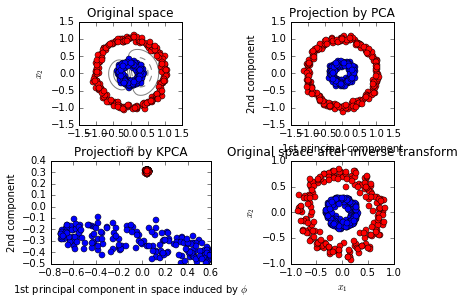

In [8]:
plotResults()